# Canal de Pauli

Este canal é importante em criptografia e é definido como
$$\Lambda_{p}(\rho) = \sum_{j,k=0}^{1}p_{j,k}Z^{j}X^{k}\rho X^{k}Z^{j},$$
em que $X,Z$ são as matrizes de Pauli e $p_{j,k}$ é uma distribuição de probabilidades.
Usando $ZX=-iY$ obtemos
\begin{align}
\Lambda_{p}(\rho) & = p_{0,0}\rho + p_{0,1}X\rho X + p_{1,0}Z\rho Z + p_{1,1}ZX\rho XZ \\
& = p_{0,0}\rho + p_{0,1}X\rho X + p_{1,0}Z\rho Z + p_{1,1}(-i)Y\rho iY \\
& = p_{0,0}\rho + p_{0,1}X\rho X + p_{1,0}Z\rho Z + p_{1,1}Y\rho Y \\
& =: p_{I}\rho + p_{X}X\rho X + p_{Z}Z\rho Z + p_{Y}Y\rho Y \\
& =: K_{0}\rho K_{0}^{\dagger} + K_{1}\rho K_{1}^{\dagger} + K_{2}\rho K_{2}^{\dagger} + K_{3}\rho K_{3}^{\dagger},
\end{align}
com
$$K_{0}=\sqrt{p_{I}}\mathbb{I},\  K_{1} = \sqrt{p_{X}}X,\ K_{2} = \sqrt{p_{Z}}Z,\ K_{3} = \sqrt{p_{Y}}Y.$$

In [1]:
%run init.ipynb

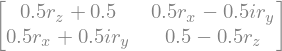

In [2]:
rx,ry,rz = symbols('r_x r_y r_z')
rho1qb = (1/2)*(id(2) + rx*pauli(1) + ry*pauli(2) + rz*pauli(3))
rho1qb

In [3]:
pI,pX,pZ,pY = symbols('p_I p_X p_Z p_Y')
K0 = sqrt(pI)*id(2); K1 = sqrt(pX)*pauli(1); K2 = sqrt(pZ)*pauli(3); K3 = sqrt(pY)*pauli(2)

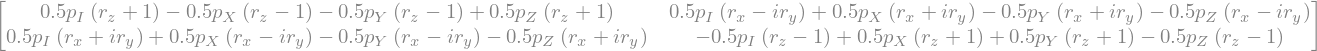

In [5]:
rho_p = K0*rho1qb*K0 + K1*rho1qb*K1 + K2*rho1qb*K2 + K3*rho1qb*K3
simplify(rho_p)

Vemos assim que o vetor de Bloch evoluído no tempo para um qubit sob o canal de Pauli é (usamos também $\sum_{j=0}^{3}p_{j}=1$)
\begin{align}
& r_{x}^{p} = \big(p_{I}+p_{X}-p_{Z}-p_{Y}\big)r_{x}, \\
& r_{y}^{p} = \big(p_{I}-p_{X}-p_{Z}+p_{Y}\big)r_{y}, \\
& r_{z}^{p} = \big(p_{I}-p_{X}+p_{Z}-p_{Y}\big)r_{z}.
\end{align}

## Implementação via preparação de estados

Começamos com o cálculo de $|\Psi\rangle_{AB}$. Usamos 
$$|\psi\rangle = \cos(\theta/2)|0\rangle + e^{i\phi}\sin(\theta/2)|1\rangle$$
e $Y|0\rangle=i|1\rangle$ e $Y|1\rangle=-i|0\rangle$ para escrever
\begin{align}
K_{0}|\psi\rangle & = \sqrt{p_{I}}\mathbb{I}|\psi\rangle = \sqrt{p_{I}}\big(\cos(\theta/2)|0\rangle + e^{i\phi}\sin(\theta/2)|1\rangle\big), \\ 
K_{1}|\psi\rangle & = \sqrt{p_{X}}X|\psi\rangle = \sqrt{p_{X}}\big(\cos(\theta/2)|1\rangle + e^{i\phi}\sin(\theta/2)|0\rangle\big), \\
K_{2}|\psi\rangle & = \sqrt{p_{Z}}Z|\psi\rangle = \sqrt{p_{Z}}\big(\cos(\theta/2)|0\rangle - e^{i\phi}\sin(\theta/2)|1\rangle\big), \\
K_{3}|\psi\rangle & = \sqrt{p_{Y}}Y|\psi\rangle = i\sqrt{p_{Y}}\big(\cos(\theta/2)|1\rangle - e^{i\phi}\sin(\theta/2)|0\rangle\big).
\end{align}

Teremos assim que
\begin{align}
|\Psi\rangle_{AB} & = K_{0}|\psi\rangle_{A}\otimes|0\rangle_{B} + K_{1}|\psi\rangle_{A}\otimes|1\rangle_{B} + K_{2}|\psi\rangle_{A}\otimes|2\rangle_{B} + K_{3}|\psi\rangle_{A}\otimes|3\rangle_{B} \\
& = \sqrt{p_{I}}\big(\cos(\theta/2)|0\rangle_{A} + e^{i\phi}\sin(\theta/2)|1\rangle_{A}\big)\otimes|0\rangle_{B} + \sqrt{p_{X}}\big(\cos(\theta/2)|1\rangle_{A} + e^{i\phi}\sin(\theta/2)|0\rangle_{A}\big)\otimes|1\rangle_{B} \\
& + \sqrt{p_{Z}}\big(\cos(\theta/2)|0\rangle_{A} - e^{i\phi}\sin(\theta/2)|1\rangle_{A}\big)\otimes|2\rangle_{B} + i\sqrt{p_{Y}}\big(\cos(\theta/2)|1\rangle_{A} - e^{i\phi}\sin(\theta/2)|0\rangle_{A}\big)\otimes|3\rangle_{B} \\
& = \sqrt{p_{I}}\cos(\theta/2)|00\rangle_{AB} + \sqrt{p_{I}}e^{i\phi}\sin(\theta/2)|10\rangle_{AB} + \sqrt{p_{X}}\cos(\theta/2)|11\rangle_{AB} + \sqrt{p_{X}}e^{i\phi}\sin(\theta/2)|01\rangle_{AB} \\
& + \sqrt{p_{Z}}\cos(\theta/2)|02\rangle_{AB} - \sqrt{p_{Z}}e^{i\phi}\sin(\theta/2)|12\rangle_{AB} + \sqrt{p_{Y}}\cos(\theta/2)|13\rangle_{AB} - \sqrt{p_{Y}}e^{i\phi}\sin(\theta/2)|03\rangle_{AB} \\
& \doteq \sqrt{p_{I}}\cos(\theta/2)|000\rangle_{abc} + \sqrt{p_{I}}e^{i\phi}\sin(\theta/2)|100\rangle_{abc} + \sqrt{p_{X}}\cos(\theta/2)|101\rangle_{abc} + \sqrt{p_{X}}e^{i\phi}\sin(\theta/2)|001\rangle_{abc} \\
& + \sqrt{p_{Z}}\cos(\theta/2)|010\rangle_{abc} - \sqrt{p_{Z}}e^{i\phi}\sin(\theta/2)|110\rangle_{abc} + i\sqrt{p_{Y}}\cos(\theta/2)|111\rangle_{abc} - i\sqrt{p_{Y}}e^{i\phi}\sin(\theta/2)|011\rangle_{abc},
\end{align}
em que usamos o qubit $a$ para representar $A$ e os qubits $b$ e $c$ para representar $B$.

### Casos particulares
Denotemos
$$\Lambda_{p} = \Lambda_{p}^{p_{I},p_{X},P_{Z},P_{Y}}.$$
O canal de Pauli generaliza os canais bit flip, phase flip, bit-phase flip e depolarizing:
\begin{align}
& \Lambda_{bf}(\rho) := p\rho + (1-p)X\rho X \equiv \Lambda_{p}^{p,1-p,0,0}, \\
& \Lambda_{pf}(\rho) := p\rho + (1-p)Z\rho Z \equiv \Lambda_{p}^{p,0,1-p,0}, \\
& \Lambda_{bpf}(\rho) := p\rho + (1-p)Y\rho Y \equiv \Lambda_{p}^{p,0,0,1-p}, \\
& \Lambda_{d}(\rho) := p\rho + (1-p)\frac{\mathbb{I}_{2}}{2} \equiv \Lambda_{p}^{(1+3p)/4,(1-p)/4,(1-p)/4,(1-p)/4},
\end{align}
com $p\in[0,1]$.

Com isso, o estado a ser preparado para simular o o canal bit flip,
$$p_{I}=p,\ p_{X}=1-p,\ p_{Z}=p_{Y}=0,$$
é
\begin{align}
|\Psi_{bf}\rangle_{AB} & = \sqrt{p}\cos(\theta/2)|000\rangle_{abc} + \sqrt{p}e^{i\phi}\sin(\theta/2)|100\rangle_{abc} + \sqrt{1-p}\cos(\theta/2)|101\rangle_{abc} + \sqrt{1-p}e^{i\phi}\sin(\theta/2)|001\rangle_{abc} \\
& + \sqrt{0}\cos(\theta/2)|010\rangle_{abc} - \sqrt{0}e^{i\phi}\sin(\theta/2)|110\rangle_{abc} + \sqrt{0}\cos(\theta/2)|111\rangle_{abc} - \sqrt{0}e^{i\phi}\sin(\theta/2)|011\rangle_{abc} \\
& = \big(\sqrt{p}\cos(\theta/2)|00\rangle_{ac} + \sqrt{p}e^{i\phi}\sin(\theta/2)|10\rangle_{ac} + \sqrt{1-p}\cos(\theta/2)|11\rangle_{ac} + \sqrt{1-p}e^{i\phi}\sin(\theta/2)|01\rangle_{ac}\big)|0\rangle_{b}.
\end{align}
Ou seja, nesse caso particular precisamos somente um qubit auxiliar.

O estado a ser preparado para simular o o canal phase flip,
$$p_{I}=p,\ p_{X}=0,\ p_{Z}=1-p,\ p_{Y}=0,$$
é
\begin{align}
|\Psi_{pf}\rangle_{AB} & = \sqrt{p}\cos(\theta/2)|000\rangle_{abc} + \sqrt{p}e^{i\phi}\sin(\theta/2)|100\rangle_{abc} + \sqrt{0}\cos(\theta/2)|101\rangle_{abc} + \sqrt{0}e^{i\phi}\sin(\theta/2)|001\rangle_{abc} \\
& + \sqrt{1-p}\cos(\theta/2)|010\rangle_{abc} - \sqrt{1-p}e^{i\phi}\sin(\theta/2)|110\rangle_{abc} + \sqrt{0}\cos(\theta/2)|111\rangle_{abc} - \sqrt{0}e^{i\phi}\sin(\theta/2)|011\rangle_{abc} \\
 & = \big(\sqrt{p}\cos(\theta/2)|00\rangle_{ab} + \sqrt{p}e^{i\phi}\sin(\theta/2)|10\rangle_{ab} + \sqrt{1-p}\cos(\theta/2)|01\rangle_{ab} - \sqrt{1-p}e^{i\phi}\sin(\theta/2)|11\rangle_{ab}\big)|0\rangle_{c}.
\end{align}
Neste caso particular também precisamos somente um qubit auxiliar.

O estado a ser preparado para simular o o canal bit-phase flip,
$$p_{I}=p,\ p_{X}=0,\ p_{Z}=0,\ p_{Y}=1-p,$$
é
\begin{align}
|\Psi_{bpf}\rangle_{AB} & = \sqrt{p}\cos(\theta/2)|000\rangle_{abc} + \sqrt{p}e^{i\phi}\sin(\theta/2)|100\rangle_{abc} + \sqrt{0}\cos(\theta/2)|101\rangle_{abc} + \sqrt{0}e^{i\phi}\sin(\theta/2)|001\rangle_{abc} \\
& + \sqrt{0}\cos(\theta/2)|010\rangle_{abc} - \sqrt{0}e^{i\phi}\sin(\theta/2)|110\rangle_{abc} + i\sqrt{1-p}\cos(\theta/2)|111\rangle_{abc} - i\sqrt{1-p}e^{i\phi}\sin(\theta/2)|011\rangle_{abc} \\
& = \sqrt{p}\cos(\theta/2)|000\rangle_{abc} + \sqrt{p}e^{i\phi}\sin(\theta/2)|100\rangle_{abc} + i\sqrt{1-p}\cos(\theta/2)|111\rangle_{abc} - i\sqrt{1-p}e^{i\phi}\sin(\theta/2)|011\rangle_{abc} \\
& = \sqrt{p}\cos(\theta/2)|00\rangle_{ad} + \sqrt{p}e^{i\phi}\sin(\theta/2)|10\rangle_{ad} + i\sqrt{1-p}\cos(\theta/2)|11\rangle_{ad} - i\sqrt{1-p}e^{i\phi}\sin(\theta/2)|01\rangle_{ad} \\
\end{align}
Neste caso particular, pela maneira como definimos a isometria, precisamos de dois qubits auxiliares.

O estado a ser preparado para simular o canal depolarizing,
$$p_{I}=\frac{1+3p}{4},\ p_{X}=p_{Z}=p_{Y}=\frac{1-p}{4},$$
é
\begin{align}
|\Psi_{d}\rangle_{AB} & = \sqrt{\frac{1+3p}{4}}\cos(\theta/2)|000\rangle_{abc} + \sqrt{\frac{1+3p}{4}}e^{i\phi}\sin(\theta/2)|100\rangle_{abc} + \sqrt{\frac{1-p}{4}}\cos(\theta/2)|101\rangle_{abc} + \sqrt{\frac{1-p}{4}}e^{i\phi}\sin(\theta/2)|001\rangle_{abc} \\
& + \sqrt{\frac{1-p}{4}}\cos(\theta/2)|010\rangle_{abc} - \sqrt{\frac{1-p}{4}}e^{i\phi}\sin(\theta/2)|110\rangle_{abc} + \sqrt{\frac{1-p}{4}}\cos(\theta/2)|111\rangle_{abc} - \sqrt{\frac{1-p}{4}}e^{i\phi}\sin(\theta/2)|011\rangle_{abc}.
\end{align}
Neste caso particular também precisamos de dois qubits auxiliares.

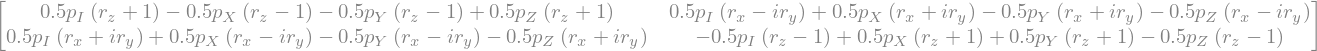

In [6]:
p = symbols('p')
pI = (1+3*p)/4; pX = (1-p)/4; pY = pX; pZ = pX
rho_p = K0*rho1qb*K0 + K1*rho1qb*K1 + K2*rho1qb*K2 + K3*rho1qb*K3
simplify(rho_p)

In [1]:
import numpy as np
from matplotlib import pyplot as plt

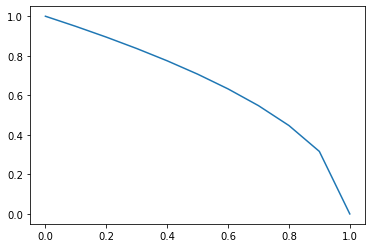

In [2]:
p = np.arange(0,1.1,0.1) # PD channel
C = np.sqrt(1-p)
plt.plot(p,C)
plt.show()

In [3]:
from sympy import *

In [7]:
N,p = symbols('N p')
K0 = sqrt(1-N)*Matrix([[1,0],[0,sqrt(1-p)]])
K1 = sqrt(1-N)*Matrix([[0,sqrt(p)],[0,0]])
K2 = sqrt(N)*Matrix([[sqrt(1-p),0],[0,1]])
K3 = sqrt(N)*Matrix([[0,0],[sqrt(p),0]])
#K0

In [11]:
r00,r01,r10,r11 = symbols('r_{00} r_{01} r_{10} r_{11}')#; r00
rho = Matrix([[r00,r01],[r10,r11]])#; rho

In [13]:
rho_gad = K0*rho*K0 + K1*rho*K1.T + K2*rho*K2 + K3*rho*K3.T
simplify(rho_gad)

Matrix([
[-N*p*r_{00} - N*p*r_{11} + p*r_{11} + r_{00},                          r_{01}*sqrt(1 - p)],
[                          r_{10}*sqrt(1 - p), N*p*r_{00} + N*p*r_{11} - p*r_{11} + r_{11}]])